In [337]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications import Xception
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [338]:
#https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [339]:
path = r"C:/Users/Admin/Desktop/NG/train/iv"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
roman_numbers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            roman_numbers.append(file.name)
       

In [1]:
#roman_numbers

In [341]:

# load the image as a 224x224 array
img = load_img(roman_numbers[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [342]:

reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
(1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [343]:

x = preprocess_input(reshaped_img)

In [344]:
#!pip uninstall h5py

In [345]:
#!pip install h5py

In [346]:
#from keras.applications.vgg16 import VGG16
model = Xception() #VGG16()

In [347]:

# load the model first and pass as an argument
model = VGG16() # ()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

data = pd.DataFrame()
#p = r"C:/Users/Admin/Desktop/NG/roman_numbers.pkl"

# lop through each image in the dataset
for roman in roman_numbers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(roman,model)
        print(feat)
        data[roman] = feat
    if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          

In [348]:
data = pd.DataFrame()

In [349]:
# lop through each image in the dataset
for roman in roman_numbers:
    feat = extract_features(roman,model)
    data[roman] = feat.tolist()
    print(feat[0])

[0.        1.2176166 4.2237053 ... 0.        0.        0.       ]
[0.         0.40163732 2.0001726  ... 0.         0.         1.5326457 ]
[0.         0.         1.6456242  ... 0.         0.         0.06765437]
[0.       0.       3.820847 ... 0.       0.       0.      ]
[0.         0.         1.4189851  ... 0.         0.         0.71337277]
[0.         0.         1.716493   ... 0.         0.         0.04903007]
[0.        0.        2.6036687 ... 0.        0.        0.       ]
[0.24769017 0.19288278 0.57603824 ... 0.         0.         0.        ]
[0.         0.         1.733063   ... 0.         0.         0.11555934]
[0.        0.        1.3035014 ... 0.        0.        0.8693807]
[0.         0.         2.1311507  ... 0.         0.         0.48618364]
[0.04454005 0.         1.8223474  ... 0.         0.         0.        ]
[0.16833282 0.         3.8872972  ... 0.         0.         0.        ]
[0.25600624 0.         3.6918154  ... 0.         0.         0.        ]
[3.012292 0.       4.2

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


[0.        0.        2.3075678 ... 0.        0.        1.1414888]
[0.         0.         0.50514907 ... 0.         0.         1.2288613 ]
[0.33214334 0.         4.176996   ... 0.         0.         0.        ]
[0.         0.         1.3314621  ... 0.         0.         0.44084132]
[0.48587018 1.0845916  0.97788286 ... 0.         0.         0.8467739 ]
[0.         0.         1.358551   ... 0.         0.         0.30948564]
[1.787551   0.7983651  0.8903868  ... 0.         0.         0.39269724]
[2.2052464  1.4641964  0.26857084 ... 0.         0.         0.        ]
[0.05398917 0.         0.6858738  ... 0.         0.         1.3651845 ]
[0.         0.85180604 2.2744904  ... 0.         0.36046183 0.4998157 ]
[0.20244193 0.6646672  2.3542123  ... 0.         0.         1.2257383 ]
[0.        0.6039009 1.0711956 ... 0.        0.        1.5674814]
[0.         0.         2.2055502  ... 0.         0.         0.19936907]
[0.         0.26376647 0.1781232  ... 0.         0.         0.32979712]
[0. 

[0.3567995  0.18402389 1.2229965  ... 0.         0.         1.6369643 ]
[0.4537429  0.42072004 0.94928277 ... 0.         0.         2.1395802 ]
[0.21645492 1.375537   0.3378452  ... 0.         0.         0.        ]
[0.         0.16058543 2.0879006  ... 0.         0.         0.        ]
[0.         0.60938203 0.360812   ... 0.         0.         0.        ]
[0.        0.3519004 1.3108131 ... 0.        0.        0.       ]
[0.         0.45677632 1.6185815  ... 0.         0.         0.        ]
[1.2782335  1.3334603  1.8405801  ... 0.         0.         0.87950873]
[1.934445  1.8059114 2.6810064 ... 0.        0.        0.       ]
[0.         0.02512828 1.3955581  ... 0.         0.         0.1323812 ]
[0.        0.        2.3589125 ... 0.        0.        0.5421012]
[0.22834265 0.         2.4162714  ... 0.         0.         0.        ]
[0.25830036 0.         1.1534358  ... 0.         0.66046655 0.        ]
[0.        0.        3.3336372 ... 0.        0.        0.       ]
[0.        0.502

[0.         1.0115337  0.39730853 ... 0.         0.         0.        ]
[0.7484933  0.72825706 2.5099006  ... 0.         0.         0.        ]
[2.2835932  0.21251038 1.3301135  ... 0.         0.         0.        ]
[0.         0.         0.         ... 0.         0.         0.12547326]
[0.        0.        2.2068374 ... 0.        0.4449145 0.3120692]
[0.        0.        0.        ... 0.        1.8295648 0.       ]
[0. 0. 0. ... 0. 0. 0.]
[1.3484998  1.9318889  0.         ... 0.         0.         0.27184707]
[0.60676277 1.4885062  0.         ... 0.         0.         0.        ]
[1.4327357  1.7381377  0.94592077 ... 0.         0.         0.        ]
[0.         0.5825078  0.69305    ... 0.         0.         0.29651216]
[0.40248132 0.9059411  1.2933202  ... 0.         0.         0.        ]
[0.         0.         0.97233653 ... 0.         0.         0.        ]
[0.         0.         1.2363901  ... 0.         0.         0.11900449]
[0.       0.       3.174449 ... 0.       0.       0.

[0.        1.7892023 0.        ... 0.        0.        2.0266373]
[0.         0.14372829 1.4354982  ... 0.         0.         2.253447  ]
[1.2506014  0.8624732  1.1940522  ... 0.         0.         0.27182832]
[0.950847  0.        2.101326  ... 0.        0.        0.7236708]
[0.       0.       1.706987 ... 0.       0.       0.      ]
[0.         0.71372485 1.8478009  ... 0.         0.         0.        ]
[0.         0.         2.4916148  ... 0.         0.         0.63044953]
[0.04674029 0.         1.0091527  ... 0.         0.         0.        ]
[0.         0.03462404 1.6980602  ... 0.         0.         0.        ]
[0.        0.        0.3610749 ... 0.        0.        0.9223285]
[0.        0.        2.0165706 ... 0.        0.        0.9816922]
[0.        0.        1.4819558 ... 0.        0.        0.       ]
[0.         0.         1.4198815  ... 0.         0.         0.42809838]
[0.01080668 0.         0.1650495  ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[1.6978929

[2.2357543 0.        2.477075  ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.        1.3007436 0.        ... 0.        0.8359861 0.       ]
[0.        0.6084807 0.9017577 ... 0.        0.        1.2457058]
[0.         0.         3.5094676  ... 0.         0.         0.04464012]
[0.        2.0868104 1.4002836 ... 0.        0.        1.6852767]
[0.        0.6547429 1.0517969 ... 0.        0.        0.       ]
[0.42518592 0.         1.5662944  ... 0.         0.         0.        ]
[0.         0.5355707  0.04574275 ... 0.         0.         0.04641855]
[0.         0.07521939 1.4367089  ... 0.         0.         0.        ]
[0.        1.0101424 0.        ... 0.        0.        0.       ]
[0.         0.95474553 0.         ... 0.         0.         0.30084798]
[0.11997974 2.1365848  0.         ... 0.         0.         1.6414206 ]
[0.        2.1638813 0.        ... 0.        0.        1.0507077]
[0.         1.1146889  1.0703194  ... 0.         0.1228581

[0.         0.38130814 1.7316169  ... 0.         0.         0.29472673]
[0.21541259 1.3069731  2.0427728  ... 0.         0.         0.4440329 ]
[0.         0.         1.5975126  ... 0.         0.         0.17913526]
[0.        0.        2.6768231 ... 0.        0.        0.       ]
[0.        0.605366  1.4399247 ... 0.        0.        0.       ]
[0.         0.23799123 2.1282296  ... 0.         0.         0.        ]
[3.1422167 0.        5.444571  ... 0.        0.        0.       ]
[0. 0. 0. ... 0. 0. 0.]
[0.        0.        2.8182173 ... 0.        0.        0.       ]
[0.        0.        1.7178808 ... 0.        0.        0.       ]
[0.        0.        2.70652   ... 0.        0.        0.9164179]
[0.        0.        3.2548242 ... 0.        0.        0.       ]
[0.1976982 0.        4.3068476 ... 0.        0.        0.       ]
[0.         0.         1.5859308  ... 0.         0.11281008 0.        ]
[0.        0.        1.6079106 ... 0.        0.        0.       ]
[0.        0.        2

[0.         0.         0.9356959  ... 0.         0.         0.59373146]
[0.         0.         2.1273394  ... 0.         0.         0.40505713]
[0.         0.35720804 2.1644192  ... 0.         0.         0.18757075]
[0.         0.         0.58251613 ... 0.         0.         0.19542587]
[0.         0.07307604 1.1440004  ... 0.         0.         0.        ]
[0.         0.08094102 1.929406   ... 0.         0.         0.        ]
[0.        0.        1.0870949 ... 0.        0.        1.2983389]
[0.         0.         2.028822   ... 0.         0.         0.94033074]
[0.        0.        1.378576  ... 0.        0.        1.2058127]
[0.         0.34914678 2.4163218  ... 0.         0.         0.60111564]
[0.        0.        2.2744603 ... 0.        0.        0.       ]
[0.        0.        2.1421494 ... 0.        0.        0.       ]
[0.         0.01635185 2.694149   ... 0.         0.         0.27660275]
[0.         0.         2.2662086  ... 0.         0.         0.09691703]
[0.        0.   

In [350]:
np.array(data.T[0][0]).shape

(4096,)

In [351]:
data_cluster = data.T

In [352]:
data_cluster.columns = ['features']

In [353]:
X = np.array(data_cluster['features'])
#X = X.reshape(-1, 1)

In [354]:
X = pd.DataFrame(X)

In [355]:
X.columns = ['features']

In [356]:
feats = pd.DataFrame(X.features.tolist(), index= X.index)

In [357]:
import sklearn
print(sklearn.__version__)

0.24.2


In [377]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=25)
# fit model and predict clusters
yhat = model.fit_predict(feats)
# retrieve unique clusters

In [378]:
from sklearn.cluster import KMeans

In [379]:
# fit model and predict clusters
#model = KMeans(n_clusters=30, random_state=0)
#yhat = model.fit_predict(feats)

# creare similitudini fra gruppi

In [380]:
feats['cluster'] = yhat

In [381]:
feats['cluster'].value_counts()

10    87
8     80
6     76
3     60
17    59
1     57
14    56
9     54
11    43
0     38
12    38
23    35
19    31
22    31
4     25
21    25
2     24
15    24
7     22
20    21
13    14
24    12
18    12
5     10
16     8
Name: cluster, dtype: int64

In [382]:
data_cluster['cluster'] = yhat

0
10
14
15
18
13
5
17
7
19
21
1
24
9
23
3
11
6
22
20
12
8
2
4
16


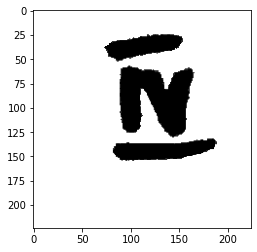

In [383]:
parent = 'C:/Users/Admin/Desktop/NG/clusters/'
for clst in feats['cluster'].unique():
    print(clst)
    path = os.path.join(parent, str(clst)+'/')
    os.mkdir(path)
    for j in range(0,len(data_cluster[data_cluster['cluster']==clst])):
        #print(i)
        img = load_img(data_cluster[data_cluster['cluster']==clst].index[j], target_size=(224,224))
        imgplot = plt.imshow(img)
        img.save(path+str(j)+".jpg")
        #plt.show()